# Tutorial 6
## Solution to Homework 1

The code is credited to: Muhammad Danish

## **Q1: RS Metrics**


### Q1.1: Compute the Root Mean Squared Error (RMSE)

The Root Mean Squared Error (RMSE) is a commonly used metric to evaluate the accuracy of predictions. It is defined as:

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

where $y_i$ is the true value and $\hat{y}_i$ is the predicted value.

Given the following arrays `truth` and `pred`, compute the RMSE:

```python
import numpy as np

truth = np.array([3.0, -0.5, 2.0, 7.0])
pred = np.array([2.5, 0.0, 2.0, 8.0])
```

Implement the solution to calculate the RMSE:

In [3]:
## Your solution here
import numpy as np

truth = np.array([3.0, -0.5, 2.0, 7.0])
pred = np.array([2.5, 0.0, 2.0, 8.0])

def rmse(truth, predictions):
    return np.sqrt(np.mean(np.square(truth - predictions)))

print(rmse(truth, pred))

0.6123724356957945


### Recall: Formulation of Recommender Systems

- Training dataset: [userID, itemID, rating]
  - rating: $r_{ui}$ for $(u,i) \in \Omega^{tr}$.
- Testing dataset: [userID, itemID, ?]
- Evaluation: Given $\Omega^{te}$, a set of user-item pair we want to predict,
$$
    \text{RMSE} = \left(\frac{1}{|\Omega^{te}|} \sum_{(u, i) \in \Omega^{te}} (\widehat{r}_{ui} - r_{ui})^2\right)^{1/2}
$$
- Goal: Find predicted ratings $(\widehat{r}_{ui})_{(u,i)\in\Omega^{te}}$ that minimze RMSE.

### Q1.2: Define and Test the Mean Absolute Error (MAE) Function

The Mean Absolute Error (MAE) is another popular metric to evaluate the accuracy of predictions. It is defined as:

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} | y_i - \hat{y}_i |
$$

where $y_i$ is the true value and $\hat{y}_i$ is the predicted value.

#### Tasks:
1. Define a function `mae(true_ratings, pred_ratings)` that calculates the MAE given the true ratings and predicted ratings.
2. Test your function using the provided `truth` and `pred` arrays, and print the MAE.

Given arrays:

```python
import numpy as np

truth = np.array([3.0, -0.5, 2.0, 7.0])
pred = np.array([2.5, 0.0, 2.0, 8.0])
```

Define and test the `mae` function:

In [4]:
## Your solution here
def mae(truth, predictions):
    return np.mean(np.abs(truth - predictions))

mae(truth, pred)

np.float64(0.5)

## **Q2: Your First Custom sklearn-type RS**

**Task Description**

In this task, you will implement a user-item average based recommender system using the Netflix dataset from the CUHK-STAT3009 GitHub repository.

```python
import numpy as np
import pandas as pd

# Load the Netflix dataset from the CUHK-STAT3009 GitHub repository
# Repository link: https://github.com/statmlben/CUHK-STAT3009/tree/main/dataset/netflix

train = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/test.csv')

# Convert DataFrame to NumPy arrays
```

**New Recommender System - User-Item Average**

Create a custom class `UserItemAverageRS` that inherits from `sklearn.BaseEstimator`. Implement the `fit` method to compute the parameter, and the `predict` method to generate predictions based on the user-item average formula:

$$\widehat{r}_{ui} = \frac{\bar{r}_u + \bar{r}_i}{2}$$

where

$$\bar{r}_u = \frac{1}{|I_u|} \sum_{i \in I_u} r_{ui}, \quad \bar{r}_i = \frac{1}{|U_i|} \sum_{u \in U_i} r_{ui}$$

**Evaluate the Recommender System**

Fit the custom recommender system to the training data and generate predictions for the test data. Compute and report the Root Mean Squared Error (RMSE) for the predictions.

**Note**: Make sure to follow the sklearn API guidelines for implementing custom estimators.

In [5]:
import pandas as pd

# Load the Netflix dataset from the CUHK-STAT3009 GitHub repository
# Repository link: https://github.com/statmlben/CUHK-STAT3009/tree/main/dataset/netflix

train = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/test.csv')


In [6]:
train.head()

,movie_id,user_id,rating,date
0,670,1960,4,2004-02-10
1,152,1346,4,2003-02-15
2,1741,785,4,2005-06-15
3,3032,686,5,2004-05-09
4,536,1894,4,2005-07-10


In [7]:
## Your solution here
from sklearn.base import BaseEstimator
class UserItemAverageRS(BaseEstimator):
    def fit(self, X):
        self.user_average = X.groupby('user_id')['rating'].mean().to_dict()
        self.item_average = X.groupby('movie_id')['rating'].mean().to_dict()
        self.global_average = X['rating'].mean()
        return self

    def predict(self, X):
        user_means = X['user_id'].map(self.user_average).fillna(self.global_average)
        item_means = X['movie_id'].map(self.item_average).fillna(self.global_average)
        return ((user_means + item_means) / 2).values

model = UserItemAverageRS()
model.fit(train)

y_true = test['rating'].values
y_pred = model.predict(test)

print("RMSE:", round(rmse(y_true, y_pred), 4))

RMSE: 0.9816


In [8]:
class UserItemAverageRS2(BaseEstimator):
    def fit(self, X):
        self.user_average = {}
        self.item_average = {}
        self.global_average = X['rating'].mean()
        for index, (item_id, user_id, rating, _) in X.iterrows():
            if item_id not in self.item_average:
                avg_rating = X[X['movie_id'] == item_id]['rating'].mean()
                self.item_average[item_id] = self.global_average if np.isnan(avg_rating) else avg_rating
            if user_id not in self.user_average:
                avg_rating = X[X['user_id'] == user_id]['rating'].mean()
                self.user_average[user_id] = self.global_average if np.isnan(avg_rating) else avg_rating

        return self

    def predict(self, X):
        predictions = []
        for index, (item_id, user_id, _, _) in X.iterrows():
            item_avg_pred = self.item_average.get(item_id, self.global_average)
            user_avg_pred = self.user_average.get(user_id, self.global_average)
            predictions.append((item_avg_pred + user_avg_pred) / 2)
        return np.array(predictions)


model2 = UserItemAverageRS2()
model2.fit(train)

y_true = test['rating'].values
y_pred2 = model2.predict(test)

print("RMSE:", round(rmse(y_true, y_pred2), 4))

RMSE: 0.9816


## **Q3: GridSearch CV for Ridge Regression**

**Task Description**

In this question, you will use the California Housing dataset to explore the use of GridSearch CV for hyperparameter tuning in *Ridge Regression* (similar to OLS but with penalty of the L2 norm of linear coefficients).

**Ridge Regression Formula**

Ridge regression is a linear regression technique that adds a regularization term to the cost function to reduce overfitting. The formula for ridge regression is:

$$\hat{y} = \mathbf{w}^T \mathbf{x} + b$$

where:

* $\hat{y}$ is the predicted value
* $\mathbf{w}$ is the weight vector
* $\mathbf{x}$ is the feature vector
* $b$ is the bias term

The cost function for ridge regression is:

$$J(\mathbf{w}, b) = \frac{1}{2} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \frac{\alpha}{2} \|\mathbf{w}\|^2$$

where:

* $y_i$ is the actual value
* $\hat{y}_i$ is the predicted value
* $n$ is the number of samples
* $\alpha$ is the regularization strength (hyperparameter)
* $\|\mathbf{w}\|^2$ is the L2 norm of the weight vector

**Hyperparameter to Tune**

The hyperparameter to tune in ridge regression is $\alpha$, which controls the strength of the regularization. A larger value of $\alpha$ will result in stronger regularization, which can help reduce overfitting but may also lead to underfitting. A smaller value of $\alpha$ will result in weaker regularization, which can improve model performance on the training data but may lead to overfitting.

The goal of hyperparameter tuning is to find the optimal value of $\alpha$ that balances the trade-off between model complexity and goodness of fit.


**Your task** is to find the optimal hyperparameters for Ridge Regression using `GridSearch` CV and evaluate its performance on the test set.

Please use the following code to load the dataset.

```python
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

train = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/refs/heads/main/dataset/housing/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/refs/heads/main/dataset/housing/test.csv')

feat_col = ['MedInc', 'HouseAge',
            'AveRooms', 'AveBedrms',
            'Population', 'AveOccup',
            'Latitude', 'Longitude']

target = 'MedHouseVal'

X_train, y_train = train[feat_col].values, train[target].values
X_test, y_test = test[feat_col].values, test[target].values
```


In [9]:
## Your solution here
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

train = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/refs/heads/main/dataset/housing/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/refs/heads/main/dataset/housing/test.csv')

feat_col = ['MedInc', 'HouseAge',
            'AveRooms', 'AveBedrms',
            'Population', 'AveOccup',
            'Latitude', 'Longitude']

target = 'MedHouseVal'

X_train, y_train = train[feat_col].values, train[target].values
X_test, y_test = test[feat_col].values, test[target].values

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()

grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

best_rmse = np.sqrt(-grid.best_score_)
best_alpha = grid.best_params_['alpha']
best_model = grid.best_estimator_

# --- performance ---
y_pred = best_model.predict(X_test)

print("Best alpha:", best_alpha)
print("Best cv RMSE:", best_rmse)
print("Test RMSE:", round(rmse(y_test, y_pred), 10))

Best alpha: 0.01
Best cv RMSE: 0.7232219451375423
Test RMSE: 0.7327810386


### GridSearchCV
Parameters:
- ***estimator***: estimator object
  - This is assumed to implement the scikit-learn estimator interface.
- ***param_grid***: dict or list of dictionaries
  - Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored.
- ***scoring***: str, callable, list, tuple or dict, default=None
  - Strategy to evaluate the performance of the cross-validated model on the test set.
- ***cv***: int, cross-validation generator or an iterable, default=None
  - Determines the cross-validation splitting strategy. Possible inputs for cv are:
    - None, to use the default 5-fold cross validation,
    - integer, to specify the number of folds in a KFold,
    - CV splitter, ...
- ***refit***: bool, default=True
  - Refit an estimator using the best found parameters on the whole dataset.

In [10]:
# Next possible step: tuning within a narrow range
# Be careful: sometimes even worse performance

param_grid = {'alpha': [0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013]}
ridge = Ridge()

grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

best_rmse = np.sqrt(-grid.best_score_)
best_alpha = grid.best_params_['alpha']
best_model = grid.best_estimator_

# --- performance ---
y_pred = best_model.predict(X_test)

print("Best alpha:", best_alpha)
print("Best cv RMSE:", best_rmse)
print("Test RMSE:", round(rmse(y_test, y_pred), 10))

Best alpha: 0.007
Best cv RMSE: 0.7232219439751899
Test RMSE: 0.7327811622


## **Q4 (Bonus): Generlized Sequential RS**

**Task Description:**

Design and implement a general `sklearn.BaseEstimator` type class `seqRS` that supports sequential fitting and prediction based on a list of recommender system (RS) methods. Test the class by using `UserMeanRS` and `ItemMeanRS` with custom hps, and report the RMSE for the prediction.

**Motivation:**

As demonstrated in the lecture, we can first fit a `UserMeanRS` model, then fit an `ItemMeanRS` model on the residuals, and so on. This approach can be generalized to a sequence of RS methods.

**Requirements:**

* The `seqRS` class should take a list of RS methods (`RS_list`) as an argument. (Each RS has `fit` and `predict` methods)
* The `fit` method should sequentially fit each RS method in the list to the training data.
* The `predict` method should generate predictions for the test data based on the fitted RS models.

**Example Usage:**
```python
test_seqRS = seqRS(RS_list=[UserMeanRS(n_users, min_data=5), ItemMeanRS(n_items, min_data=3)])

test_seqRS.fit(X_train, y_train)
y_pred = test_seqRS.predict(X_test)
```
**Goal:** Implement the `seqRS` class to support this sequential fitting and prediction workflow.

**Note:** Using following python code to load data:

```python
import numpy as np
import pandas as pd

train = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/test.csv')

## RS data casting with ML format
X_train = train[['user_id', 'movie_id']].values
y_train = train['rating'].values

X_test = test[['user_id', 'movie_id']].values
y_test = test['rating'].values
```

The baseline methods are defined as:

```python
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

class UserMeanRS(BaseEstimator, RegressorMixin):
    def __init__(self, n_users, min_data=3):
        self.n_users = n_users
        self.global_mean_ = 0
        self.min_data = min_data
        self.user_means_ = np.zeros(n_users)

    def fit(self, X, y):
        self.global_mean_ = np.mean(y)
        for user in range(self.n_users):
            user_indices = np.where(X[:, 0] == user)[0]
            if len(user_indices) <= self.min_data:
                self.user_means_[user] = self.global_mean_
            else:
                self.user_means_[user] = np.mean(y[user_indices])
        return self

    def predict(self, X):
        user_indices = X[:, 0]
        return self.user_means_[user_indices]

class ItemMeanRS(BaseEstimator, RegressorMixin):
    def __init__(self, n_items, min_data=3):
        self.n_items = n_items
        self.global_mean_ = 0
        self.min_data = min_data
        self.item_means_ = np.zeros(n_items)

    def fit(self, X, y):
        self.global_mean_ = np.mean(y)
        for item in range(self.n_items):
            item_indices = np.where(X[:, 1] == item)[0]
            if len(item_indices) <= self.min_data:
                self.item_means_[item] = self.global_mean_
            else:
                self.item_means_[item] = np.mean(y[item_indices])
        return self

    def predict(self, X):
        item_indices = X[:, 1]
        return self.item_means_[item_indices]
```

In [11]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, RegressorMixin

train = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/test.csv')

## RS data casting with ML format
X_train = train[['user_id', 'movie_id']].values
y_train = train['rating'].values

X_test = test[['user_id', 'movie_id']].values
y_test = test['rating'].values

class UserMeanRS(BaseEstimator, RegressorMixin):
    def __init__(self, n_users, min_data=3):
        self.n_users = n_users
        self.global_mean_ = 0
        self.min_data = min_data
        self.user_means_ = np.zeros(n_users)

    def fit(self, X, y):
        self.global_mean_ = np.mean(y)
        for user in range(self.n_users):
            user_indices = np.where(X[:, 0] == user)[0]
            if len(user_indices) <= self.min_data:
                self.user_means_[user] = self.global_mean_
            else:
                self.user_means_[user] = np.mean(y[user_indices])
        return self

    def predict(self, X):
        user_indices = X[:, 0]
        return self.user_means_[user_indices]

class ItemMeanRS(BaseEstimator, RegressorMixin):
    def __init__(self, n_items, min_data=3):
        self.n_items = n_items
        self.global_mean_ = 0
        self.min_data = min_data
        self.item_means_ = np.zeros(n_items)

    def fit(self, X, y):
        self.global_mean_ = np.mean(y)
        for item in range(self.n_items):
            item_indices = np.where(X[:, 1] == item)[0]
            if len(item_indices) <= self.min_data:
                self.item_means_[item] = self.global_mean_
            else:
                self.item_means_[item] = np.mean(y[item_indices])
        return self

    def predict(self, X):
        item_indices = X[:, 1]
        return self.item_means_[item_indices]

In [12]:
class seqRS(BaseEstimator, RegressorMixin):
    def __init__(self, RS_list):
        self.RS_list = RS_list

    def fit(self, X, y):
        self.fitted_models= []
        residual = y.copy()
        for RS in self.RS_list:
            RS.fit(X, residual)
            pred = RS.predict(X)
            residual = residual - pred
            self.fitted_models.append(RS)
        return self

    def predict(self, X):
        total_pred = np.zeros(X.shape[0])
        for RS in self.fitted_models:
            total_pred += RS.predict(X)
        return total_pred

In [13]:
n_users = int(max(train['user_id'].max(), test['user_id'].max())) + 1
n_items = int(max(train['movie_id'].max(), test['movie_id'].max())) + 1

seq_rs = seqRS(RS_list=[
    UserMeanRS(n_users, min_data=5),
    ItemMeanRS(n_items, min_data=3)
])

seq_rs.fit(X_train, y_train)
y_pred = seq_rs.predict(X_test)
print("SeqRS RMSE:", rmse(y_test, y_pred))

SeqRS RMSE: 0.9609556909222982


In [14]:
# Single model performance

user_mean_rs = UserMeanRS(n_users, min_data=5)
user_mean_rs.fit(X_train, y_train)
y_pred = user_mean_rs.predict(X_test)
print("UserMeanRS RMSE:", rmse(y_test, y_pred))


item_mean_rs = ItemMeanRS(n_items, min_data=3)
item_mean_rs.fit(X_train, y_train)
y_pred = item_mean_rs.predict(X_test)
print("ItemMeanRS RMSE:", rmse(y_test, y_pred))

UserMeanRS RMSE: 1.0113869580976027
ItemMeanRS RMSE: 1.038293429564929


### Ensemble in machine learning

#### 1. Bagging (Bootstrap Aggregating)

- Bootstrap Sampling: Randomly selects $M$ subset of size $S \le N$ with replacement from original data
- Base Model Training: For each bootstrapped subset we train a base model independently.
- Prediction Aggregation: Make a prediction on testing data by combining the predictions of all base models.

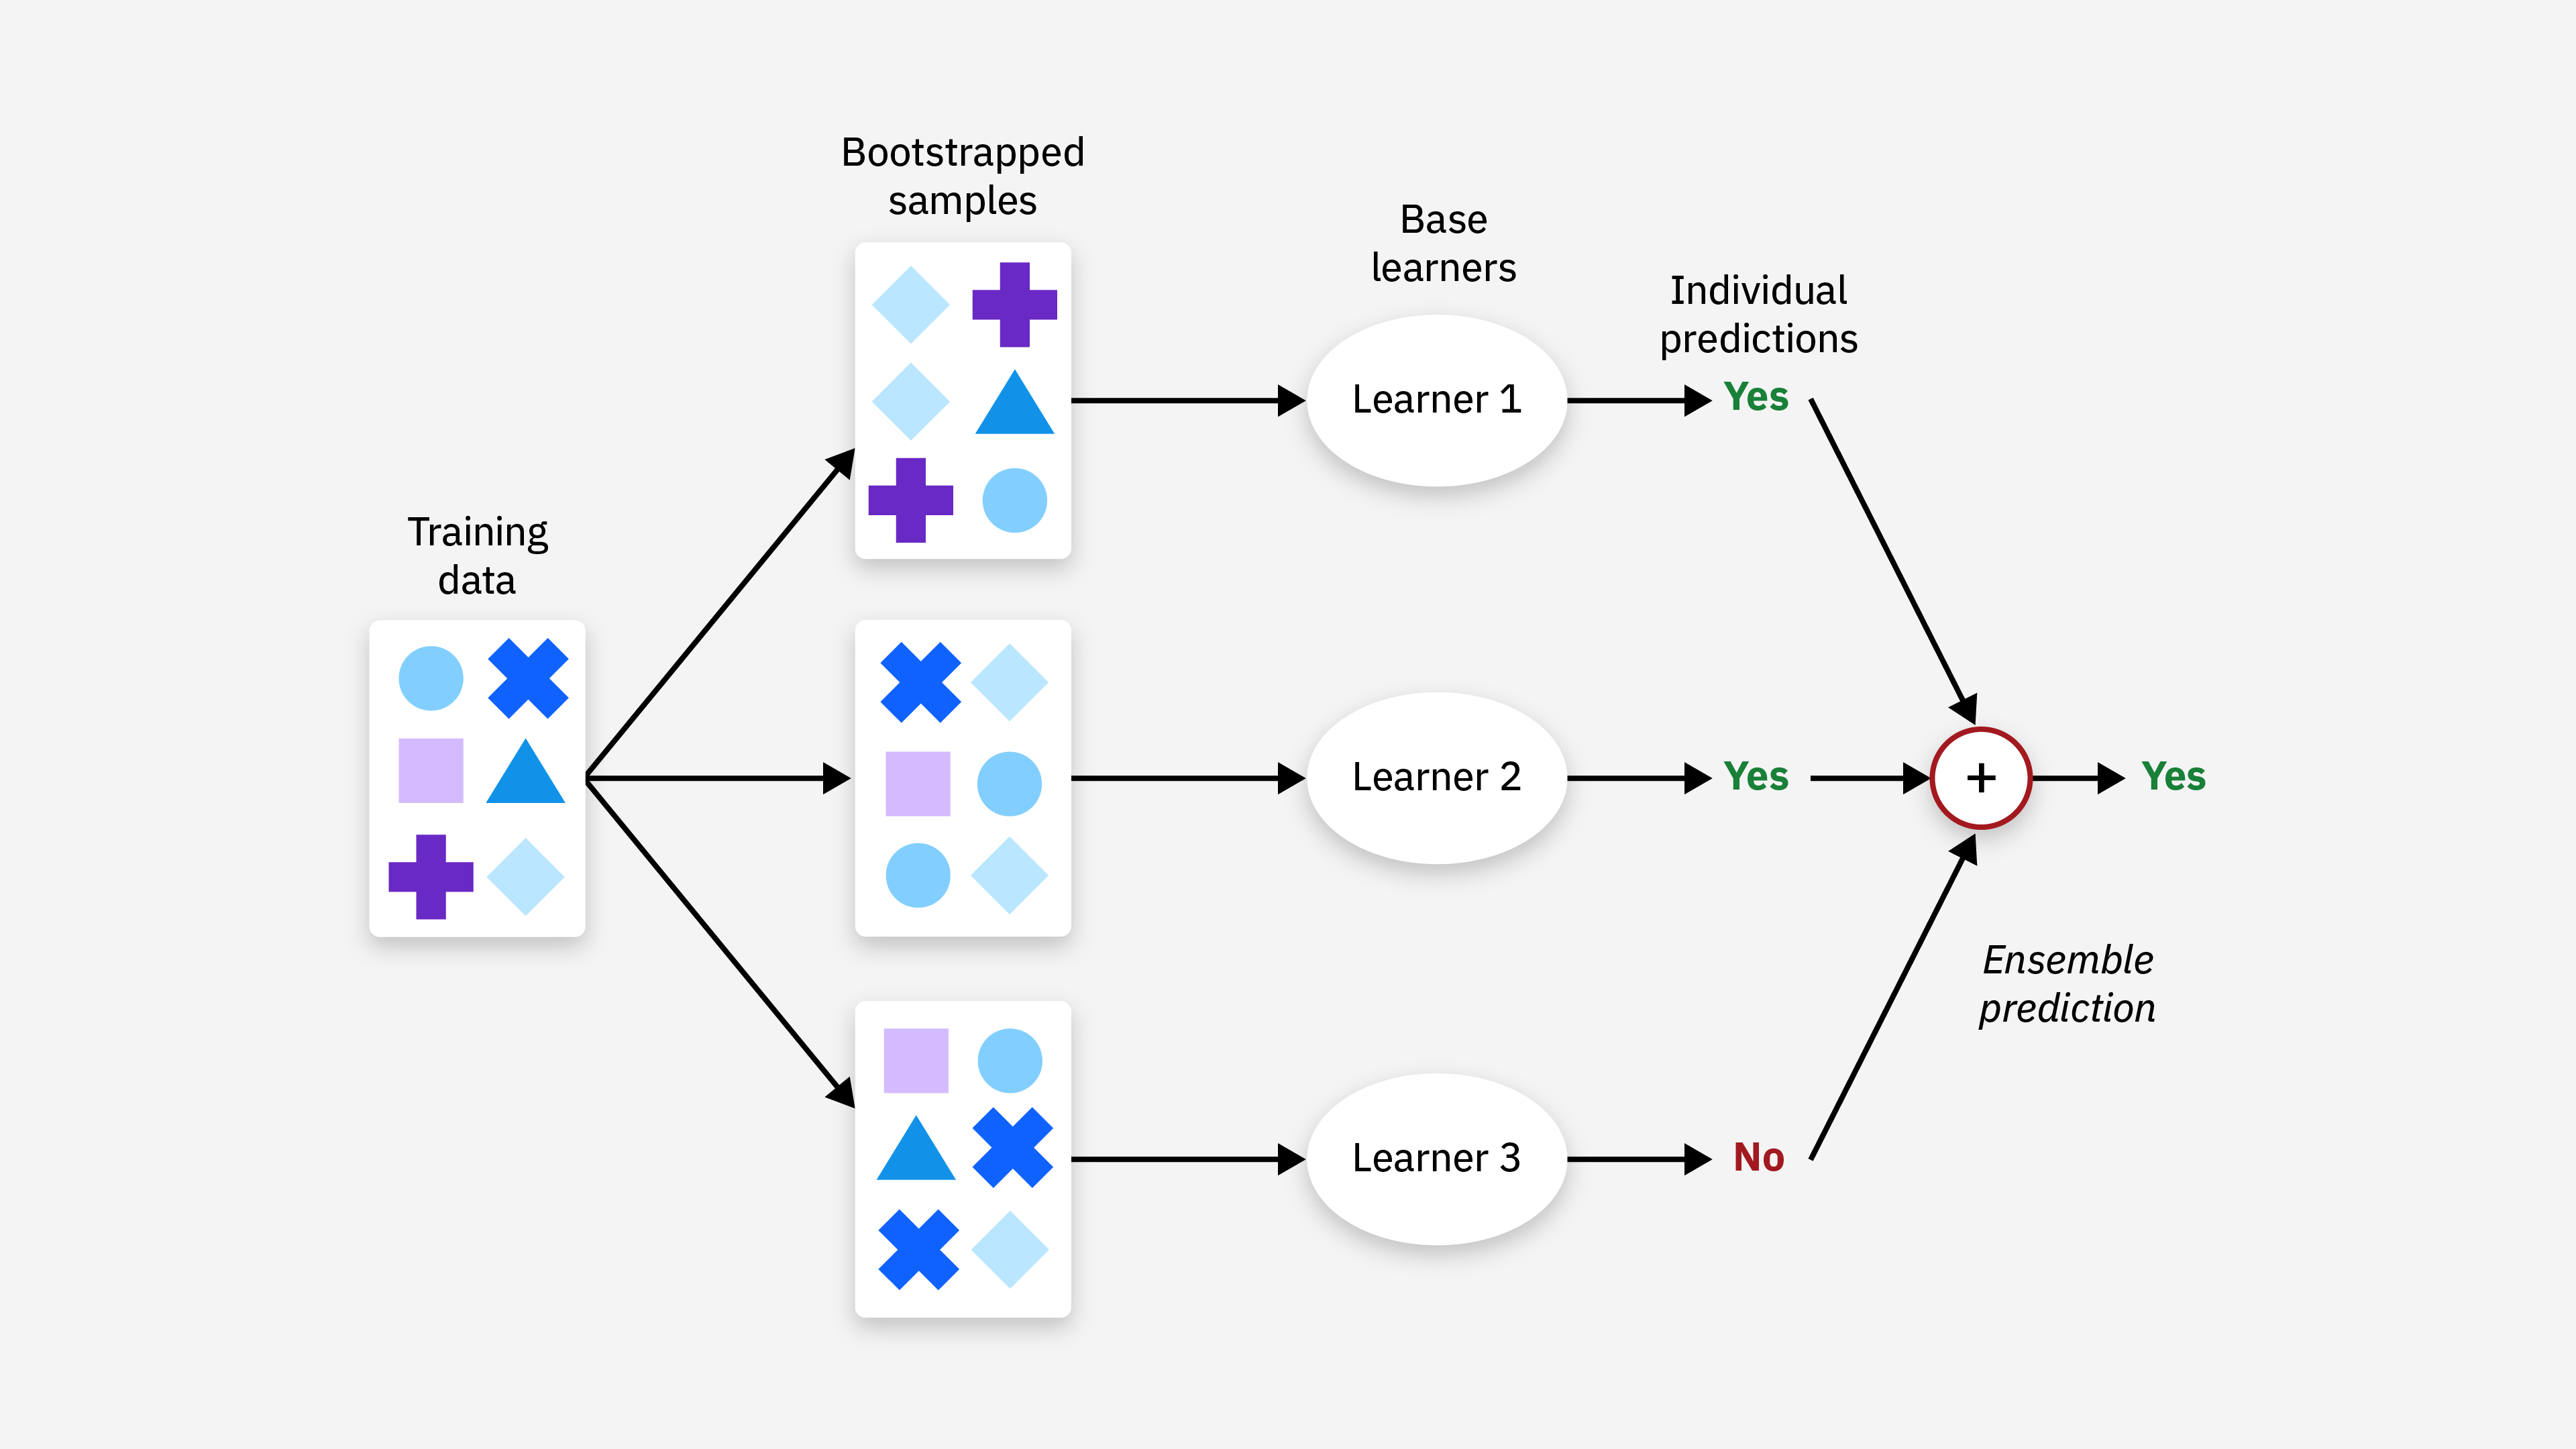

#### 2. Boosting

- Several base models are trained sequentially, where the later model is to fix the erros made by the previous one.
- Different types of boosting:
  - Gradient Boosting: new model minimizes the residual errors of old model
  - Adaptive Boosting (AdaBoost): new model assigns higher weight on the mistaked samples of the old model

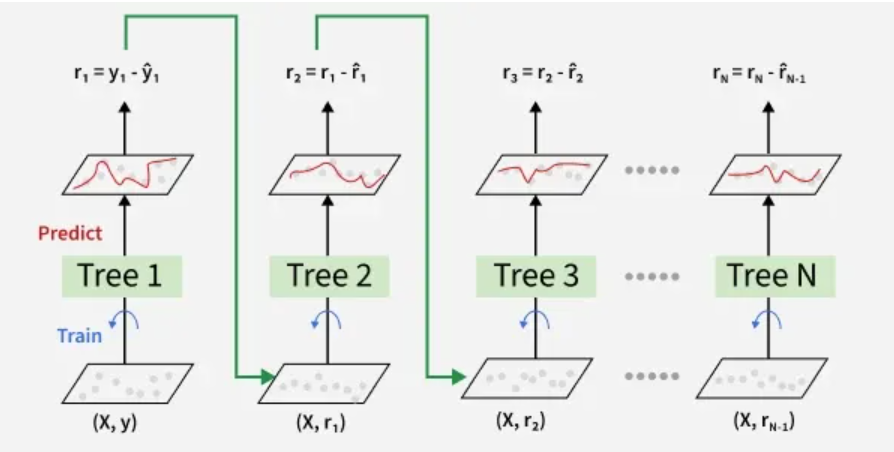

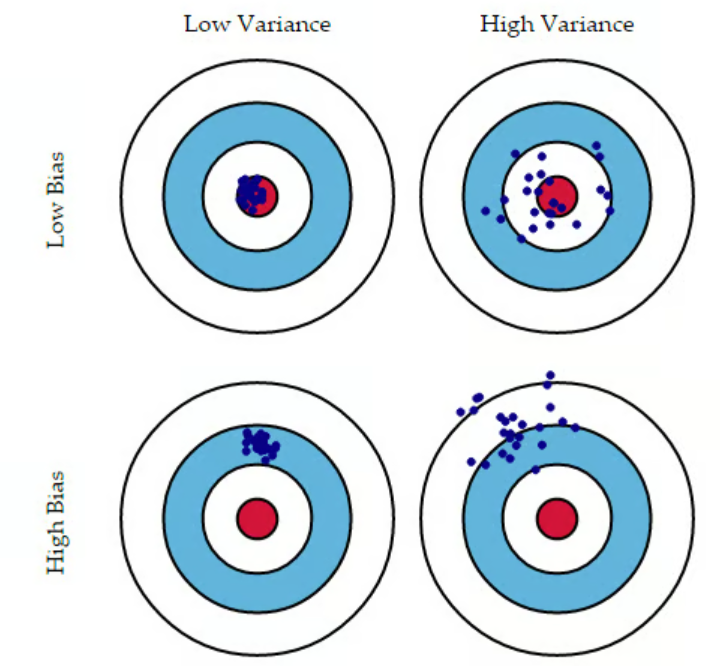

- Bagging takes average from models trained on different subsets. This averaging reduces the **variance** of models.
- Boosting corrects the mistakes sequentially, thus reduces the **bias**.



- Bagging (Bootstrap Aggregating)
  - Models are trained independently on different **random subsets** of the training data.
  - Their results are then combined: usually by averaging (for regression) or voting (for classification).
- Boosting
  - Models are trained one after another. Each new model focuses on fixing the errors made by the previous ones.
  - The final prediction is a weighted combination of all models